In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
customers = pd.read_csv('Ecommerce Customers.txt')
customers.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


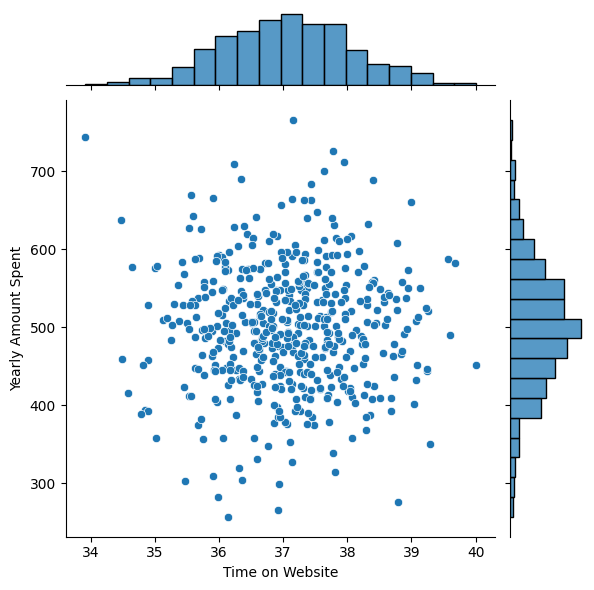

In [7]:
import seaborn as sns

sns.jointplot(
    x='Time on Website',
    y='Yearly Amount Spent',
    data=customers
)
#yes,the correction makes sense

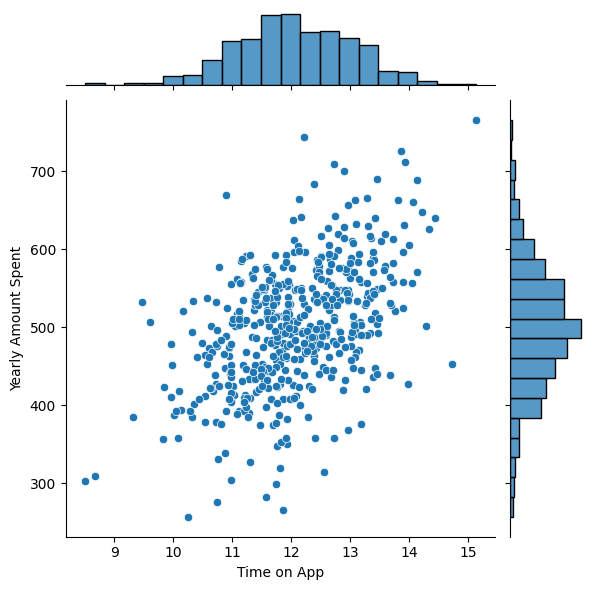

In [8]:
sns.jointplot(
    x='Time on App',
    y='Yearly Amount Spent',
    data=customers
)

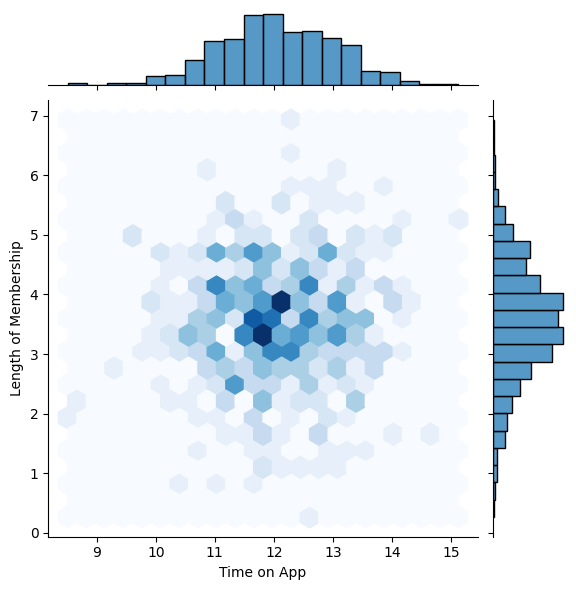

In [9]:
sns.jointplot(
    data=customers, 
    x='Time on App', 
    y='Length of Membership', 
    kind='hex',    # hexbin plot
    cmap='Blues'   # color map
)

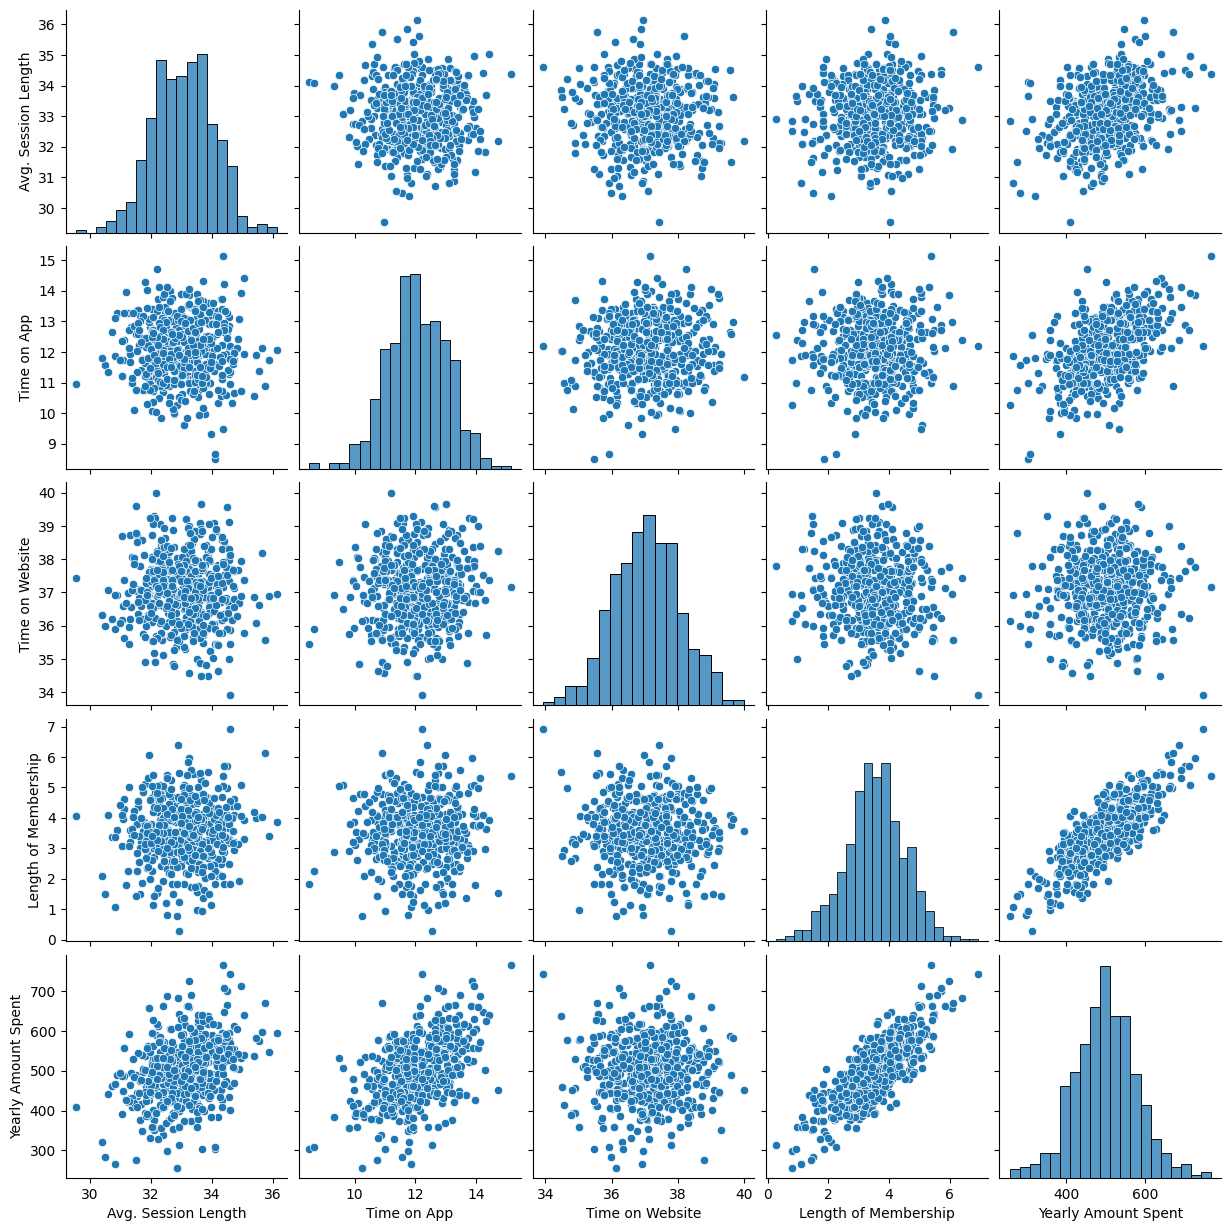

In [10]:
sns.pairplot(customers)

In [11]:
#Length of Membership is the answer

Text(0.5, 1.0, 'Yearly Amount Spent vs Length of Membership')

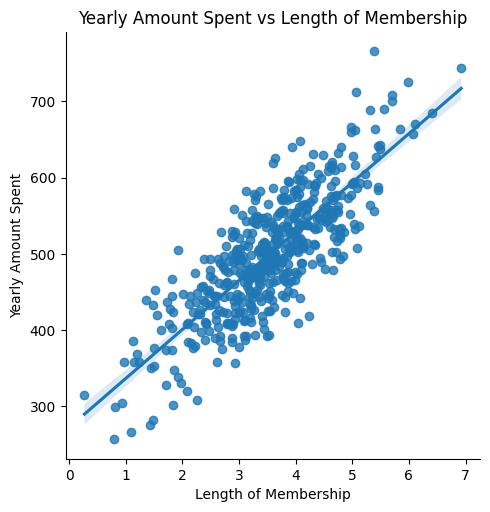

In [12]:
sns.lmplot(
    data=customers,
    x='Length of Membership',
    y='Yearly Amount Spent'
)

plt.title('Yearly Amount Spent vs Length of Membership')

In [13]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [18]:
lm.fit(X_train, y_train)
print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)

Intercept: -1047.9327822502391
Coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]


In [20]:
coefficients = lm.coef_
feature_names = X.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

Avg. Session Length: 25.981549723495785
Time on App: 38.59015875311411
Time on Website: 0.19040527751100456
Length of Membership: 61.27909654482187


In [21]:
predictions = lm.predict(X_test)


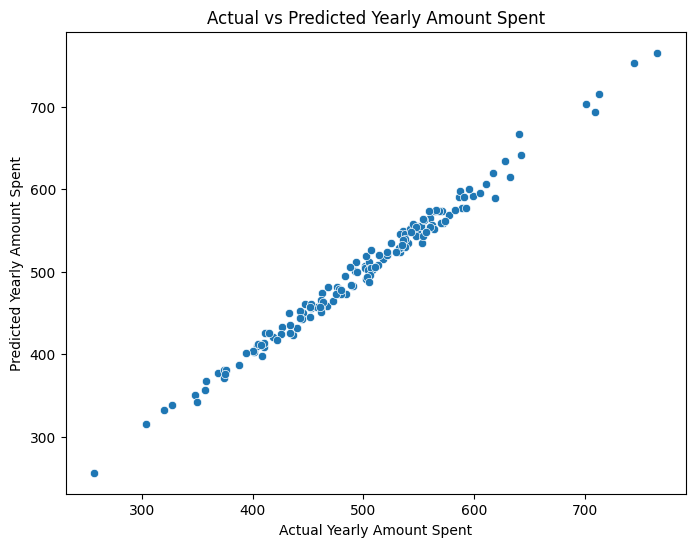

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.show()

In [23]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)


Mean Absolute Error (MAE): 7.228148653430826
Mean Squared Error (MSE): 79.81305165097427
Root Mean Squared Error (RMSE): 8.933815066978624


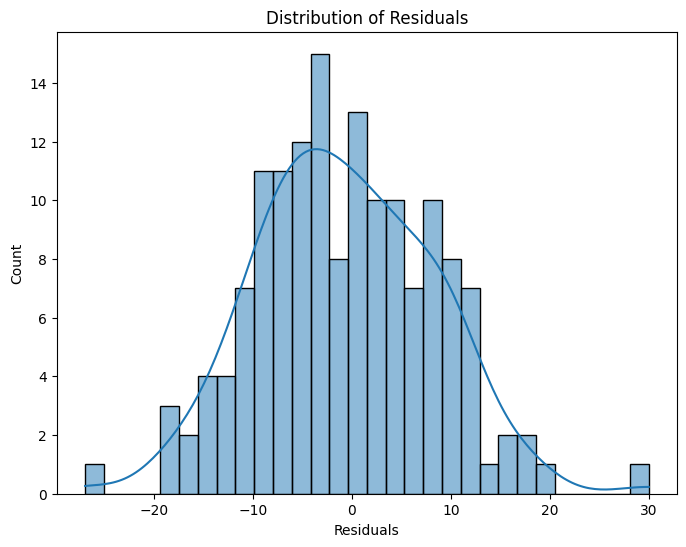

In [24]:
residuals = y_test - predictions
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [25]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


                      Coefficient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097
